In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('NaiveBayes.csv')
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
Target = df.Purchased
Inputs = df.drop('Purchased',axis='columns')

In [5]:
Target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [6]:
Inputs.isna().sum()

Age       0
Salary    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(Inputs,Target,test_size=0.3,random_state=0)

In [8]:
x_ts

,Age,Salary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_tr,y_tr)

GaussianNB()

In [10]:
y_pred = model.predict(x_ts)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [12]:
y_prob = model.predict_proba(x_ts)

In [13]:
y_prob

array([[9.04746473e-01, 9.52535272e-02],
       [8.45277586e-01, 1.54722414e-01],
       [8.61375035e-01, 1.38624965e-01],
       [9.28012995e-01, 7.19870050e-02],
       [9.03967615e-01, 9.60323847e-02],
       [9.61377244e-01, 3.86227559e-02],
       [9.17565863e-01, 8.24341366e-02],
       [5.16480951e-02, 9.48351905e-01],
       [9.90728965e-01, 9.27103483e-03],
       [4.82652501e-01, 5.17347499e-01],
       [9.56988442e-01, 4.30115581e-02],
       [9.67532124e-01, 3.24678760e-02],
       [8.64291272e-01, 1.35708728e-01],
       [7.37833586e-01, 2.62166414e-01],
       [9.78581429e-01, 2.14185712e-02],
       [5.42531007e-01, 4.57468993e-01],
       [8.02957648e-01, 1.97042352e-01],
       [9.82047792e-01, 1.79522084e-02],
       [4.27977634e-03, 9.95720224e-01],
       [8.72881852e-01, 1.27118148e-01],
       [9.04457507e-01, 9.55424933e-02],
       [6.42326606e-03, 9.93576734e-01],
       [7.55411469e-01, 2.44588531e-01],
       [1.35920536e-01, 8.64079464e-01],
       [9.823149

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_ts)
cm

array([[74,  8],
       [ 5, 33]], dtype=int64)

<Axes: >

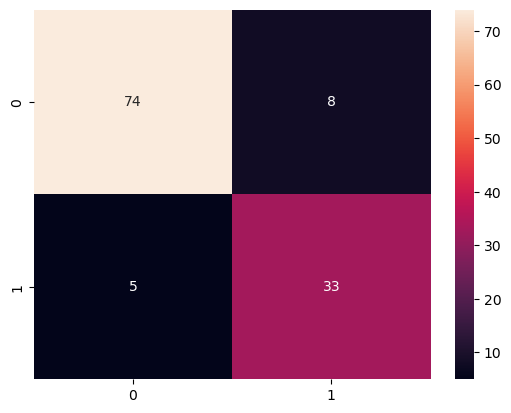

In [16]:
sns.heatmap(cm,annot=True)